# Notebook Imports


In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

plt.style.use("ggplot")

# Reading Data

In [118]:
df = pd.read_csv("cleaned_data.csv", index_col=0)
df = df.drop(columns=["title"])
df.head()

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,ET
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,T


# Splitting Dataset


In [119]:
encoding = {"E": 0, "ET": 1, "T": 2, "M": 3}
df.esrb_rating = df.esrb_rating.replace(encoding)

In [120]:
train, val = train_test_split(df, test_size=0.2)

# Data Cleaning

In our data we have a lot of explanatory variables, some of which are possibly not highly correlated with the explanatory variable, and hence would end up causing bias in our bias
 

For this reason, we can remove the variables which are not correlated with the explanatory variable. 

The following cells lists down the variables sorted in ascending order of absolute value of correlation with esrb_rating

In [121]:
# train.corr().esrb_rating.sort_values(key= lambda x: abs(x))

We remove the variables with abs(correlation) < 0.2

In [122]:
# columns_to_drop = train.columns[
#     train.corr().esrb_rating.sort_values(key=lambda x: abs(x)) < 0.15
# ]

# train = train.drop(columns=columns_to_drop)
# train.head()


Printing the new correlation matrix


In [123]:
# plt.figure(figsize=(10, 10))
# sns.heatmap(train.drop(columns="esrb_rating").corr(), annot=True)
# plt.show()

Divided into x and y

In [124]:
train_x = train.drop(columns="esrb_rating")
train_y = train.esrb_rating

val_x = val.drop(columns="esrb_rating")
val_y = val.esrb_rating

<h1>Important features from Random Forest Classifier</h1>

In [125]:
max_depth = math.ceil(0.3 * len(train_x.columns))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


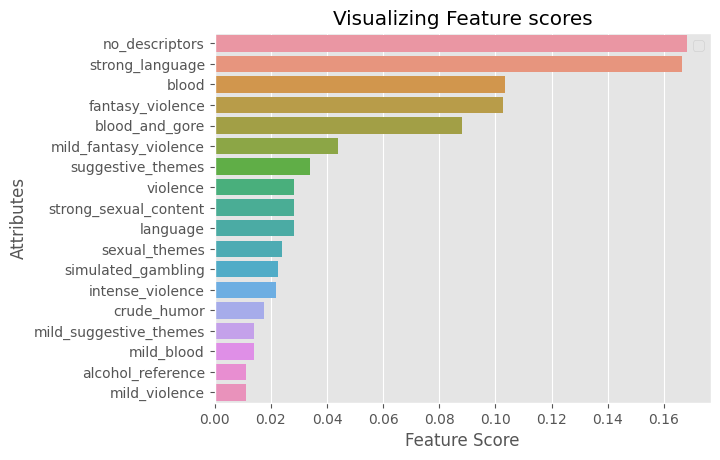

no_descriptors            0.168265
strong_language           0.166603
blood                     0.103400
fantasy_violence          0.102642
blood_and_gore            0.088271
mild_fantasy_violence     0.043831
suggestive_themes         0.034017
violence                  0.028360
strong_sexual_content     0.028343
language                  0.028182
sexual_themes             0.023986
simulated_gambling        0.022719
intense_violence          0.022023
crude_humor               0.017453
mild_suggestive_themes    0.014024
mild_blood                0.013942
alcohol_reference         0.011332
mild_violence             0.011291
dtype: float64

In [126]:
model = RandomForestClassifier(n_estimators=300, max_depth=max_depth, random_state=1, criterion="gini").fit(train_x, train_y)
feature_imp = pd.Series(model.feature_importances_,index=train_x.columns).sort_values(ascending=False)
feature_imp = feature_imp[feature_imp > 0.01]

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Score')
plt.ylabel('Attributes')
plt.title("Visualizing Feature scores")
plt.legend()
plt.show()

feature_imp

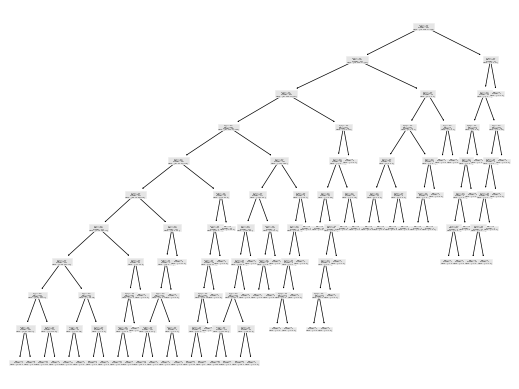

In [135]:
# plot graph of decision tree
from sklearn import tree
tree.plot_tree(model.estimators_[0])
plt.show()

In [127]:
train = train.drop(columns=feature_imp.index)
train.head()
train.columns

Index(['console', 'animated_blood', 'cartoon_violence', 'drug_reference',
       'lyrics', 'mature_humor', 'mild_cartoon_violence', 'mild_language',
       'mild_lyrics', 'nudity', 'partial_nudity', 'sexual_content',
       'use_of_alcohol', 'use_of_drugs_and_alcohol', 'esrb_rating'],
      dtype='object')

<AxesSubplot:>

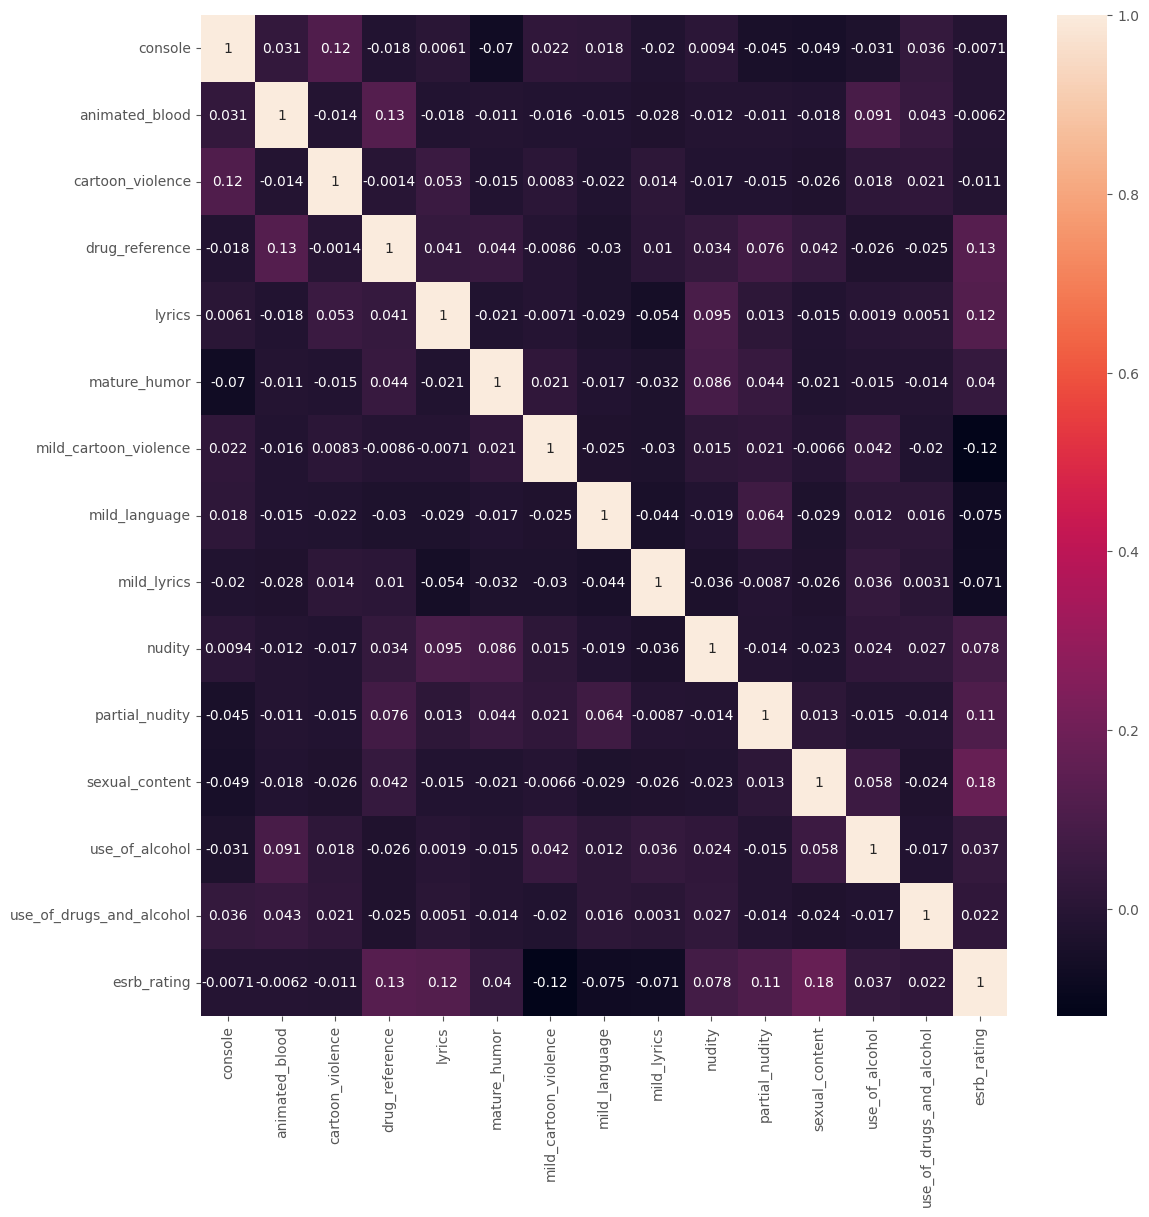

In [128]:
plt.figure(figsize=(13, 13))
sns.heatmap(train.corr(), annot=True)

In [129]:
train_x = train.drop(columns="esrb_rating")
train_y = train.esrb_rating

val_x = val.drop(columns="esrb_rating")
val_y = val.esrb_rating